# Student Admissions

Goal: Predict student admissions to graduate school at UCLA based on GRE Scores, GPA Scores, and class rank (1-4) 

Dataset from http://www.ats.ucla.edu/

Based on the [Predicting Student Admissions](https://github.com/udacity/aind2-dl) mini project of the [Udacity's Artificial Intelligence  Nanodegree](https://www.udacity.com/course/artificial-intelligence-nanodegree--nd889)

In [69]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare the data

In [70]:
data_path = 'data/student_admissions.csv'
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(400, 4)


,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [71]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [72]:
target = ['admit']
features = ['gre', 'gpa', 'rank']

categorical = ['admit', 'rank']
numerical = ['gre', 'gpa']

# NaN values
df.fillna(df[numerical].median(), inplace=True)       # NaN from numerical feature replaced by median
df.dropna(axis='index', how='any', inplace = True)    # NaN from categorical feature: row deleted

df.shape

(399, 4)

### Visualize data

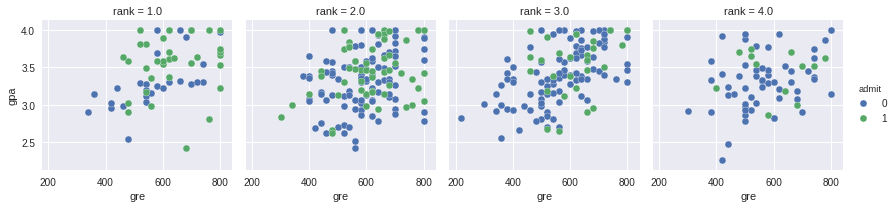

In [73]:
g = sns.FacetGrid(df, col="rank",  hue="admit")
g = (g.map(plt.scatter, "gre", "gpa", edgecolor="w")
    .add_legend())